<a href="https://colab.research.google.com/github/JoseLuisPalominoMarmol/lenguaje_claro_cyc_2/blob/main/volumetr%C3%ADa/lecturabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de lecturabilidad de un sitio web

Con este código vamos a bajarnos el texto de un sitio web y a calcular su lecturabilidad de acuerdo con la fórmula de Fernández Huerta.

In [1]:
!pip install textstat

In [2]:
#Importamos las librerías
import requests
from bs4 import BeautifulSoup
import pandas as pd
import textstat

In [3]:
url = 'https://www.sspa.juntadeandalucia.es/servicioandaluzdesalud/' #indicamos la URL de la que queremos extraer textos

In [4]:
import re

In [14]:
#Descargamos los textos y los guardamos en una tabla
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extracting all the links from the page
links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

texts = []
for link in links[0:10]: #ponemos un índice para probar con los 10 primeros enlaces. Podemos quitarlo luego para descargar el sitio completo.
    if link is not None:# and link.startswith("/"):
        full_url = url + link
        response = requests.get(full_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        # Extracting all the text from the page
        text = soup.get_text()
        # Limpieza de texto eliminando caracteres de espacio múltiple, saltos de línea, etc.
        clean_text = re.sub(r'[\r\n\t]+', ' ', text)  # Reemplaza nuevas líneas, tabulaciones, etc. con un solo espacio
        clean_text = re.sub(r'\s{2,}', ' ', clean_text)  # Reemplaza múltiples espacios con un solo espacio
        clean_text = clean_text.strip()  # Elimina espacios al principio y al final del texto
        if text:
            texts.append(text)
        else:
            texts.append("")  # add empty string when no text is found

df = pd.DataFrame()
df['links'] = pd.Series(links)
df['texts'] = pd.Series(texts)

In [6]:
df.dropna() #eliminamos filas vacías

,links,texts
0,https://www.juntadeandalucia.es/,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
1,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
2,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
3,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
4,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
5,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
6,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
7,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
8,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...
9,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...


In [7]:
#Calculamos número de oraciones por página y lecturabilidad
df['num oraciones'] = df['texts'].astype(str).apply(lambda x: textstat.sentence_count(x) if x else 0)
df['num palabras'] = df['texts'].astype(str).apply(lambda x: textstat.lexicon_count(x, removepunct=True) if x else 0)
df['palabras/oración'] = df['num palabras'].divide(df['num oraciones'])
df['fdz huerta'] = df['texts'].astype(str).apply(lambda x: textstat.fernandez_huerta(x) if x else 0)
df['tiempo lectura'] = df['texts'].astype(str).apply(lambda x: textstat.reading_time(x, ms_per_char=14.69) if x else 0)
df.head()


,links,texts,num oraciones,num palabras,palabras/oración,fdz huerta,tiempo lectura
0,https://www.juntadeandalucia.es/,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...,493,6593,13.373225,67.17,682.54
1,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...,493,6593,13.373225,67.17,682.54
2,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...,493,6593,13.373225,67.17,682.54
3,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...,493,6593,13.373225,67.17,682.54
4,https://www.sspa.juntadeandalucia.es/servicioa...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no en...,493,6593,13.373225,67.17,682.54


In [8]:
df['texts'][0]

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPágina no encontrada | Servicio Andaluz de Salud\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n \n\n \n\n\n\n\n\n\n\n\n\n\n\nEl SASEl Servicio Andaluz de SaludDatos básicos. HistóricoServicios y centrosAtención primaria de saludAtención hospitalariaRed Andaluza de Medicina Transfusional, Tejidos y CélulasSalud mentalPrevención del suicidioSalud y bienestar emocionalIII Plan Integral de Salud Mental 2016-2020 (en revisión)Salud mental. Red de recursosSalud mental. Derechos y recuperaciónSalud mental. Documentos recomendadosGuías y consejosGuías de información y consejo sobre psicosis y esquizofreniaUrgencias y emergenciasTrasplantesRed Coordinación de Trasplantes de AndalucíaCentros autorizados para la extracción y/o el trasplantePremio periodístico Luis PorteroCursos de formación en donación y trasplante

<Axes: >

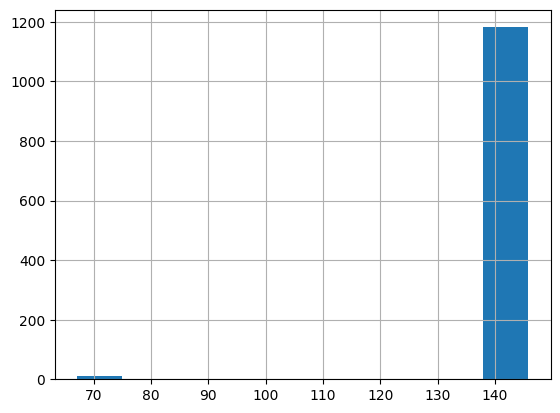

In [9]:
df['fdz huerta'].hist()

In [10]:
#Guardamos la tabla en un fichero csv
df.to_csv("sas.csv")

In [11]:
print ('media de oraciones por archivo:')
print (round (df['num oraciones'].mean(),0))
print ('media de nivel de lectura:')
print(round(df['fdz huerta'].mean(), 0))
print ('media de tiempo de lectura (segundos):')
print(round(df['tiempo lectura'].mean(), 0))



media de oraciones por archivo:
5.0
media de nivel de lectura:
145.0
media de tiempo de lectura (segundos):
6.0


<Axes: >

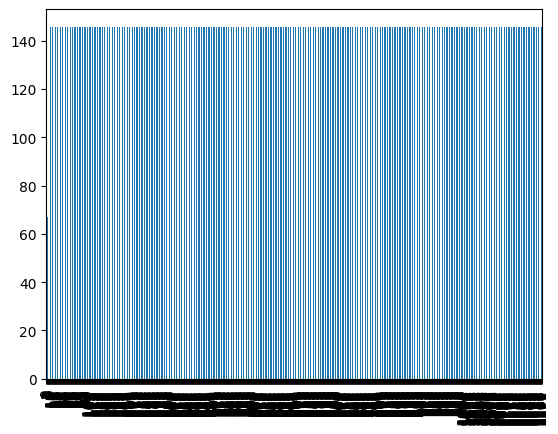

In [12]:
df['fdz huerta'].plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2326c74-8155-424a-a9ea-889ef1bb8e18' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>